<a href="https://colab.research.google.com/github/kagglematsuo/Rapid_Challenge_Report/blob/master/2_5_overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DNN_code_colab_lesson_1_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.22666666666666666
                : 10. 正答率(テスト) = 0.1692
Generation: 20. 正答率(トレーニング) = 0.25666666666666665
                : 20. 正答率(テスト) = 0.2077
Generation: 30. 正答率(トレーニング) = 0.31
                : 30. 正答率(テスト) = 0.2343
Generation: 40. 正答率(トレーニング) = 0.4166666666666667
                : 40. 正答率(テスト) = 0.3062
Generation: 50. 正答率(トレーニング) = 0.47
                : 50. 正答率(テスト) = 0.3584
Generation: 60. 正答率(トレーニング) = 0.55
                : 60. 正答率(テスト) = 0.4123
Generation: 70. 正答率(トレーニング) = 0.6
                : 70. 正答率(テスト) = 0.4502
Generation: 80. 正答率(トレーニング) = 0.63
                : 80. 正答率(テスト) = 0.4755
Generation: 90. 正答率(トレーニング) = 0.66
                : 90. 正答率(テスト) = 0.5051
Generation: 100. 正答率(トレーニング) = 0.7166666666666667
                : 100. 正答率(テスト) = 0.5429
Generation: 110. 正答率(トレーニング) = 0.7533333333333333
                : 110. 正答率(テスト) = 0.5641
Generation: 120. 正答率(トレーニング) = 0.83
                : 120. 正答率(テスト) = 0.5932
Generation: 1

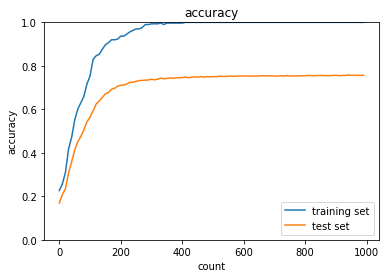

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16333333333333333
                : 10. 正答率(テスト) = 0.1134
Generation: 20. 正答率(トレーニング) = 0.23666666666666666
                : 20. 正答率(テスト) = 0.1463
Generation: 30. 正答率(トレーニング) = 0.31666666666666665
                : 30. 正答率(テスト) = 0.1919
Generation: 40. 正答率(トレーニング) = 0.45666666666666667
                : 40. 正答率(テスト) = 0.257
Generation: 50. 正答率(トレーニング) = 0.55
                : 50. 正答率(テスト) = 0.3109
Generation: 60. 正答率(トレーニング) = 0.5566666666666666
                : 60. 正答率(テスト) = 0.3499
Generation: 70. 正答率(トレーニング) = 0.55
                : 70. 正答率(テスト) = 0.3691
Generation: 80. 正答率(トレーニング) = 0.5533333333333333
                : 80. 正答率(テスト) = 0.3898
Generation: 90. 正答率(トレーニング) = 0.5566666666666666
                : 90. 正答率(テスト) = 0.4028
Generation: 100. 正答率(トレーニング) = 0.5533333333333333
                : 100. 正答率(テスト) = 0.4076
Generation: 110. 正答率(トレーニング) = 0.5766666666666667
                : 110. 正答率(テスト) = 0.423
Generation: 120. 正答率(トレーニング) = 0.

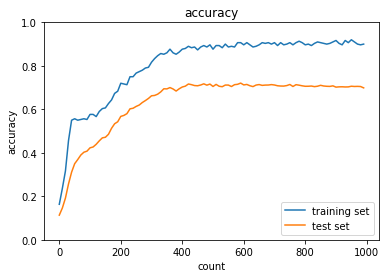

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.47333333333333333
                : 10. 正答率(テスト) = 0.3973
Generation: 20. 正答率(トレーニング) = 0.73
                : 20. 正答率(テスト) = 0.5676
Generation: 30. 正答率(トレーニング) = 0.8166666666666667
                : 30. 正答率(テスト) = 0.6217
Generation: 40. 正答率(トレーニング) = 0.8266666666666667
                : 40. 正答率(テスト) = 0.6524
Generation: 50. 正答率(トレーニング) = 0.74
                : 50. 正答率(テスト) = 0.5598
Generation: 60. 正答率(トレーニング) = 0.7466666666666667
                : 60. 正答率(テスト) = 0.581
Generation: 70. 正答率(トレーニング) = 0.8933333333333333
                : 70. 正答率(テスト) = 0.6684
Generation: 80. 正答率(トレーニング) = 0.9366666666666666
                : 80. 正答率(テスト) = 0.7121
Generation: 90. 正答率(トレーニング) = 0.8133333333333334
                : 90. 正答率(テスト) = 0.6179
Generation: 100. 正答率(トレーニング) = 0.94
                : 100. 正答率(テスト) = 0.7332
Generation: 110. 正答率(トレーニング) = 0.6633333333333333
                : 110. 正答率(テスト) = 0.5288
Generation: 120. 正答率(トレーニング) = 0.7633333333333333

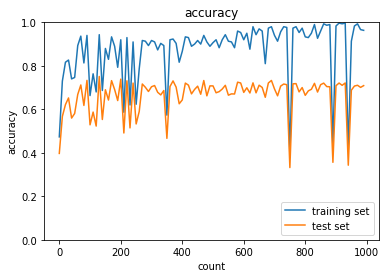

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [6]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.12333333333333334
                : 20. 正答率(テスト) = 0.1035
Generation: 30. 正答率(トレーニング) = 0.12333333333333334
                : 30. 正答率(テスト) = 0.1117
Generation: 40. 正答率(トレーニング) = 0.14333333333333334
                : 40. 正答率(テスト) = 0.1321
Generation: 50. 正答率(トレーニング) = 0.17
                : 50. 正答率(テスト) = 0.1608
Generation: 60. 正答率(トレーニング) = 0.21
                : 60. 正答率(テスト) = 0.184
Generation: 70. 正答率(トレーニング) = 0.22333333333333333
                : 70. 正答率(テスト) = 0.1997
Generation: 80. 正答率(トレーニング) = 0.24
                : 80. 正答率(テスト) = 0.2139
Generation: 90. 正答率(トレーニング) = 0.23666666666666666
                : 90. 正答率(テスト) = 0.2122
Generation: 100. 正答率(トレーニング) = 0.24666666666666667
                : 100. 正答率(テスト) = 0.222
Generation: 110. 正答率(トレーニング) = 0.26666666666666666
                : 110. 正答率(テスト) = 0.2251
Generation: 120. 正答率(トレーニング) = 0.28
                : 120.

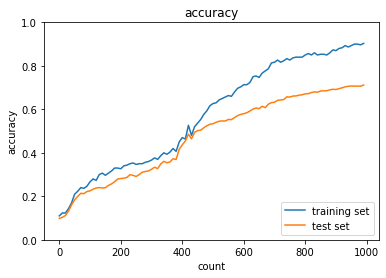

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.1006
Generation: 20. 正答率(トレーニング) = 0.14666666666666667
                : 20. 正答率(テスト) = 0.1214
Generation: 30. 正答率(トレーニング) = 0.19666666666666666
                : 30. 正答率(テスト) = 0.1508
Generation: 40. 正答率(トレーニング) = 0.24666666666666667
                : 40. 正答率(テスト) = 0.1772
Generation: 50. 正答率(トレーニング) = 0.31333333333333335
                : 50. 正答率(テスト) = 0.2054
Generation: 60. 正答率(トレーニング) = 0.36
                : 60. 正答率(テスト) = 0.2352
Generation: 70. 正答率(トレーニング) = 0.4
                : 70. 正答率(テスト) = 0.2589
Generation: 80. 正答率(トレーニング) = 0.42
                : 80. 正答率(テスト) = 0.2866
Generation: 90. 正答率(トレーニング) = 0.49
                : 90. 正答率(テスト) = 0.3283
Generation: 100. 正答率(トレーニング) = 0.53
                : 100. 正答率(テスト) = 0.3627
Generation: 110. 正答率(トレーニング) = 0.55
                : 110. 正答率(テスト) = 0.3994
Generation: 120. 正答率(トレーニング) = 0.57
                : 120. 正答率(テスト) = 0.42
Generation: 130. 正答率(トレーニング

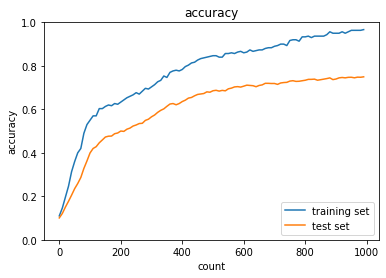

In [8]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

L1正則化のweight_decay_lambdaを増やしたもの

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.38
                : 10. 正答率(テスト) = 0.2928
Generation: 20. 正答率(トレーニング) = 0.61
                : 20. 正答率(テスト) = 0.4714
Generation: 30. 正答率(トレーニング) = 0.5133333333333333
                : 30. 正答率(テスト) = 0.4057
Generation: 40. 正答率(トレーニング) = 0.5
                : 40. 正答率(テスト) = 0.4066
Generation: 50. 正答率(トレーニング) = 0.6533333333333333
                : 50. 正答率(テスト) = 0.5244
Generation: 60. 正答率(トレーニング) = 0.4766666666666667
                : 60. 正答率(テスト) = 0.3771
Generation: 70. 正答率(トレーニング) = 0.5833333333333334
                : 70. 正答率(テスト) = 0.4741
Generation: 80. 正答率(トレーニング) = 0.4266666666666667
                : 80. 正答率(テスト) = 0.3675
Generation: 90. 正答率(トレーニング) = 0.6533333333333333
                : 90. 正答率(テスト) = 0.5299
Generation: 100. 正答率(トレーニング) = 0.6066666666666667
                : 100. 正答率(テスト) = 0.5125
Generation: 110. 正答率(トレーニング) = 0.59
                : 110. 正答率(テスト) = 0.5001
Generation: 120. 正答率(トレーニング) = 0.5433333333333333
              

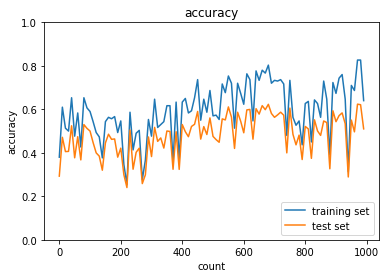

In [10]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

weight_decay_lambdaを増やすと精度が落ちることが分かる

drop_out_ratioを増やしたもの

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0767
Generation: 20. 正答率(トレーニング) = 0.09666666666666666
                : 20. 正答率(テスト) = 0.0761
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.0894
Generation: 40. 正答率(トレーニング) = 0.12666666666666668
                : 40. 正答率(テスト) = 0.0988
Generation: 50. 正答率(トレーニング) = 0.12666666666666668
                : 50. 正答率(テスト) = 0.1025
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1075
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1076
Generation: 80. 正答率(トレーニング) = 0.12666666666666668
                : 80. 正答率(テスト) = 0.1089
Generation: 90. 正答率(トレーニング) = 0.12666666666666668
                : 90. 正答率(テスト) = 0.1079
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.108
Generation: 110. 正答率(トレーニング) = 0.13333333333333333
                : 110. 正答率(テスト) = 0.1109
Generation: 120. 正答率(トレーニング) = 0.13333333333333333
                : 120

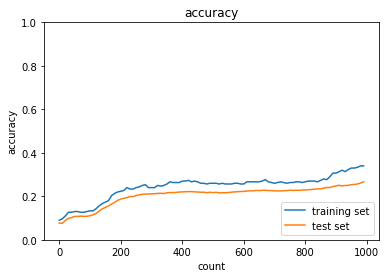

In [11]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.25
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

drop_out_ratioを増やすと学習に使うデータ数が減り、精度が落ちたと考えられる

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.2966666666666667
                : 10. 正答率(テスト) = 0.2257
Generation: 20. 正答率(トレーニング) = 0.19
                : 20. 正答率(テスト) = 0.1294
Generation: 30. 正答率(トレーニング) = 0.20666666666666667
                : 30. 正答率(テスト) = 0.1486
Generation: 40. 正答率(トレーニング) = 0.39666666666666667
                : 40. 正答率(テスト) = 0.3299
Generation: 50. 正答率(トレーニング) = 0.47333333333333333
                : 50. 正答率(テスト) = 0.3957
Generation: 60. 正答率(トレーニング) = 0.4166666666666667
                : 60. 正答率(テスト) = 0.3594
Generation: 70. 正答率(トレーニング) = 0.5133333333333333
                : 70. 正答率(テスト) = 0.4556
Generation: 80. 正答率(トレーニング) = 0.5666666666666667
                : 80. 正答率(テスト) = 0.4895
Generation: 90. 正答率(トレーニング) = 0.59
                : 90. 正答率(テスト) = 0.499
Generation: 100. 正答率(トレーニング) = 0.6566666666666666
                : 100. 正答率(テスト) = 0.5221
Generation: 110. 正答率(トレーニング) = 0.6366666666666667
                : 110. 正答率(テスト) = 0.5202
Generation: 120. 正答率(トレーニング) = 0.

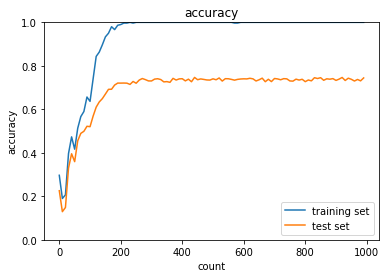

In [12]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.25
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
# optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

OptimizerをAdamに代えることで精度が向上した